In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
from matplotlib.ticker import ScalarFormatter

In [3]:
df_raw = pd.read_csv("dropout_rate.csv", sep=";", encoding="utf-8-sig")

In [6]:
quantitative_cols = [
    'Application order', 
    'Age at enrollment', 
    'Curricular units 1st sem (approved)', 
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (approved)', 
    'Curricular units 2nd sem (grade)',
]

df_bin_target = df_raw[df_raw['Target'] != 'Enrolled'].copy()

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_minmax = df_bin_target[quantitative_cols + ['Target']].copy()

df_minmax[quantitative_cols] = scaler.fit_transform(df_minmax[quantitative_cols])

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_standard = df_bin_target[quantitative_cols + ['Target']].copy()
df_standard[quantitative_cols] = scaler.fit_transform(df_standard[quantitative_cols])

In [17]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust = df_bin_target[quantitative_cols + ['Target']].copy()
df_robust[quantitative_cols] = scaler.fit_transform(df_robust[quantitative_cols])

In [18]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
df_maxabs = df_bin_target[quantitative_cols + ['Target']].copy()
df_maxabs[quantitative_cols] = scaler.fit_transform(df_maxabs[quantitative_cols])

In [24]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
df_quantile = df_bin_target[quantitative_cols + ['Target']].copy()
df_quantile[quantitative_cols] = scaler.fit_transform(df_quantile[quantitative_cols])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3184\3045964344.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


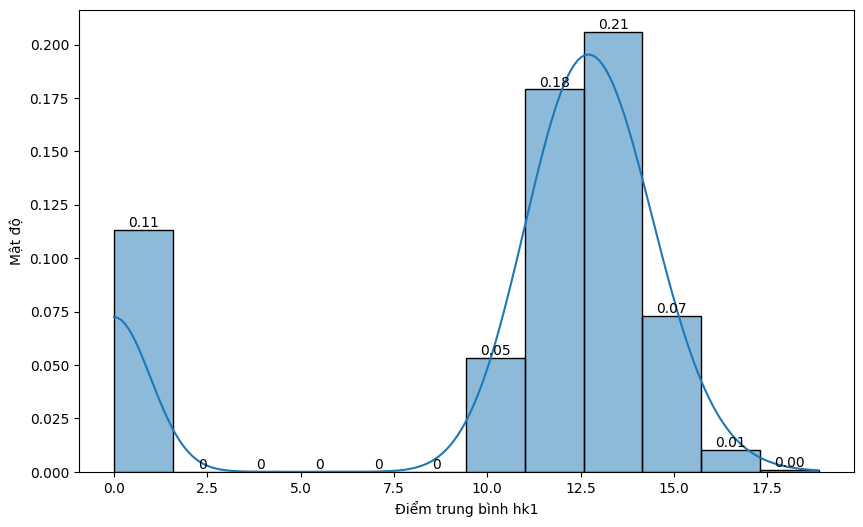

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3184\3045964344.py:25: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


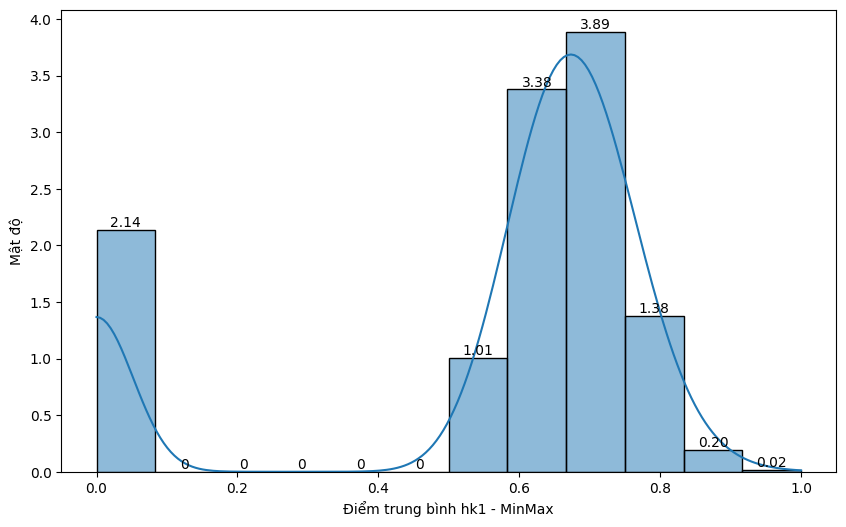

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3184\3045964344.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


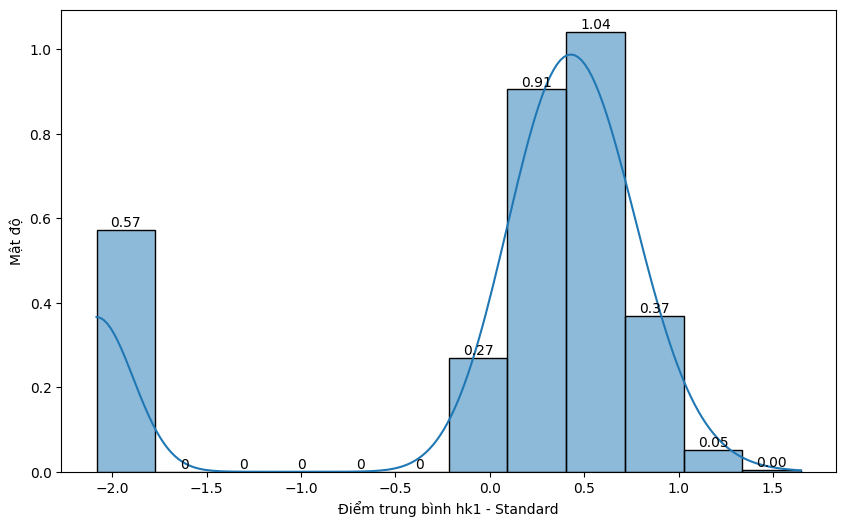

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3184\3045964344.py:71: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


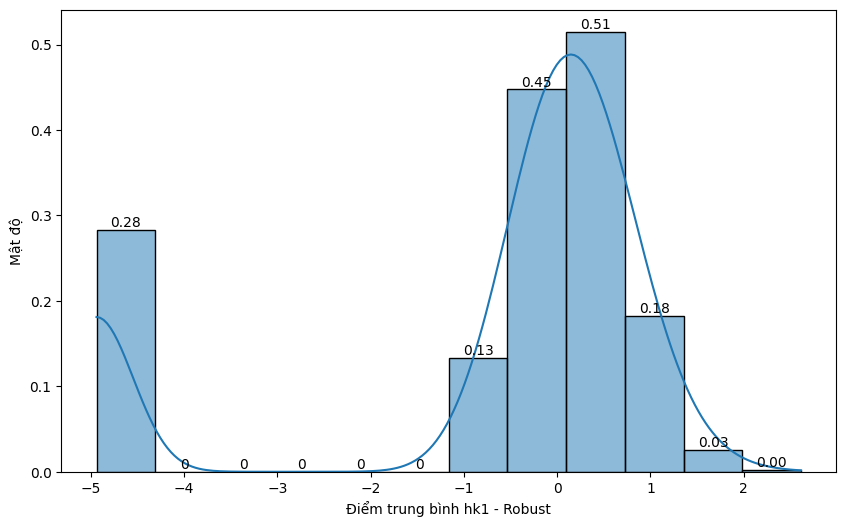

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3184\3045964344.py:94: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


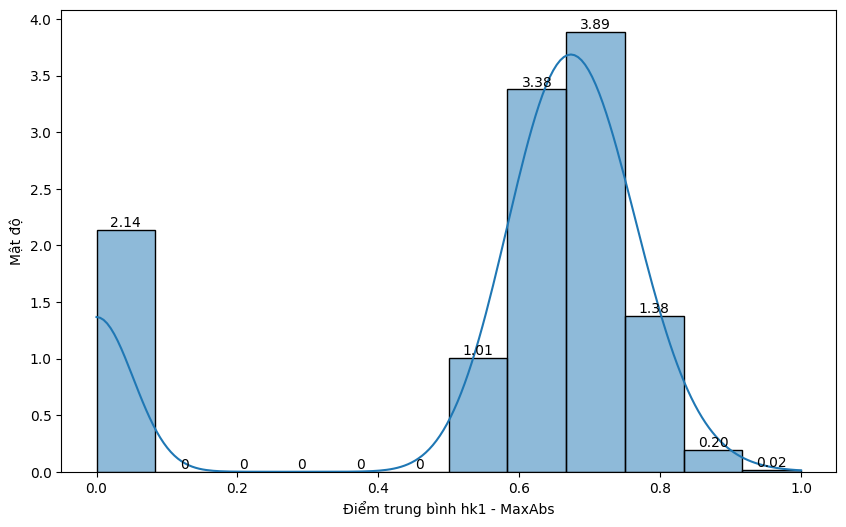

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3184\3045964344.py:117: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


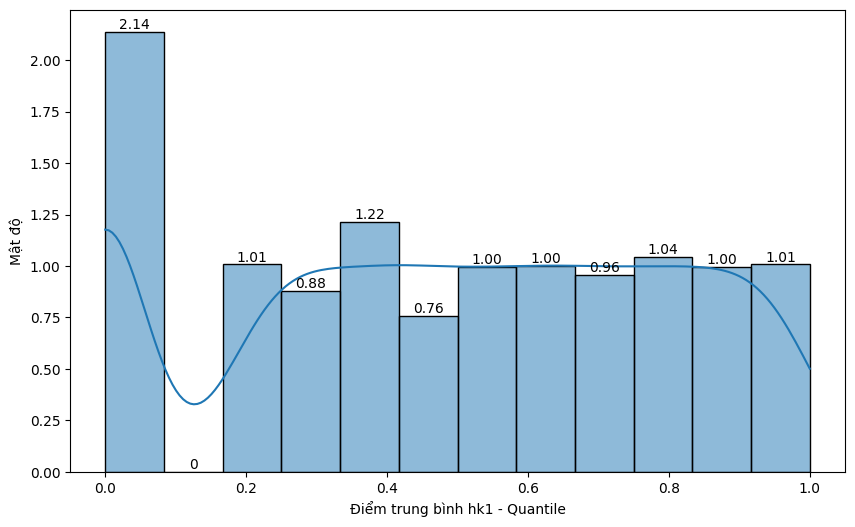

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(
    data=df_bin_target,
    x='Curricular units 1st sem (grade)',
    #hue='Target',
    palette='Set1',
    hue_order=['Dropout', 'Graduate'],
    kde=True,
    stat='density',
    legend=False,
    bins=12
)
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), 
             f'{p.get_height():.2f}' if p.get_height() != 0 else '0',
             ha='center', va='bottom', fontsize=10, color='black')


plt.xlabel('Điểm trung bình hk1')
plt.ylabel('Mật độ')
plt.show()
# --------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_minmax,
    x='Curricular units 1st sem (grade)',
    #hue='Target',
    palette='Set1',
    hue_order=['Dropout', 'Graduate'],
    kde=True,
    stat='density',
    legend=False,
    bins=12
)
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), 
             f'{p.get_height():.2f}' if p.get_height() != 0 else '0',
             ha='center', va='bottom', fontsize=10, color='black')


plt.xlabel('Điểm trung bình hk1 - MinMax')
plt.ylabel('Mật độ')
plt.show()

# --------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_standard,
    x='Curricular units 1st sem (grade)',
    #hue='Target',
    palette='Set1',
    hue_order=['Dropout', 'Graduate'],
    kde=True,
    stat='density',
    legend=False,
    bins=12
)
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), 
             f'{p.get_height():.2f}' if p.get_height() != 0 else '0',
             ha='center', va='bottom', fontsize=10, color='black')


plt.xlabel('Điểm trung bình hk1 - Standard')
plt.ylabel('Mật độ')
plt.show()

# --------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_robust,
    x='Curricular units 1st sem (grade)',
    #hue='Target',
    palette='Set1',
    hue_order=['Dropout', 'Graduate'],
    kde=True,
    stat='density',
    legend=False,
    bins=12
)
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), 
             f'{p.get_height():.2f}' if p.get_height() != 0 else '0',
             ha='center', va='bottom', fontsize=10, color='black')


plt.xlabel('Điểm trung bình hk1 - Robust')
plt.ylabel('Mật độ')
plt.show()

# --------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_maxabs,
    x='Curricular units 1st sem (grade)',
    #hue='Target',
    palette='Set1',
    hue_order=['Dropout', 'Graduate'],
    kde=True,
    stat='density',
    legend=False,
    bins=12
)
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), 
             f'{p.get_height():.2f}' if p.get_height() != 0 else '0',
             ha='center', va='bottom', fontsize=10, color='black')


plt.xlabel('Điểm trung bình hk1 - MaxAbs')
plt.ylabel('Mật độ')
plt.show()

# --------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_quantile,
    x='Curricular units 1st sem (grade)',
    #hue='Target',
    palette='Set1',
    hue_order=['Dropout', 'Graduate'],
    kde=True,
    stat='density',
    legend=False,
    bins=12
)
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), 
             f'{p.get_height():.2f}' if p.get_height() != 0 else '0',
             ha='center', va='bottom', fontsize=10, color='black')


plt.xlabel('Điểm trung bình hk1 - Quantile')
plt.ylabel('Mật độ')
plt.show()